# **Fully Scratched!**
<img src="https://art.pixilart.com/f07fa9c3d5ed379.png" width=10%>
<br>
image by NiaBeh <a href="https://www.pixilart.com/art/scratch-cat-base-f07fa9c3d5ed379">pixilart</a>

---

This is the beginning of a  R E A L L Y  cool recreational programming series,<br> in which I reimplement famous architectures and papers on pure Python!<br>
<img src="https://cdn-icons-png.flaticon.com/512/5968/5968286.png" width=5%>
<img src="https://cdn.icon-icons.com/icons2/2148/PNG/512/numpy_icon_132145.png" width=5%>
<br>

---

## **Today Recreating LeNet-5**

<img src="https://miro.medium.com/v2/resize:fit:2000/1*1TI1aGBZ4dybR6__DI9dzA.png" width=40%>
<br>

<a href="http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf">Paper</a>
<a href="https://scholar.google.com/citations?user=WLN3QrAAAAAJ&hl=en">Yann Lecun</a>

---

## **Data**
### **MNIST Dataset**
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width=30%>

# **PLAN**
## 1. Components:<br>
> 1.1) Implement Convolution Operation✅<br>
> 1.2) Implement Pooling<br>
> 1.3) Differentiate Convolution Opearation<br>
> 1.4) Flatten Layer implementation<br>
## 2. Network:<br>
> 2.1) Wrap components into layers<br>
> 2.2) Layers connectivity<br>
> 2.3) Forward Propagation<br>
> 2.4) Backward Propagation<br>
> 2.5) Updates<br>
## 3. Architecture:<br>
> 3.1) LeNet-5 with API<br>
> 3.2) Model Training<br>
> 3.3) Debugging<br>


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [4]:
data = pd.read_csv("mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


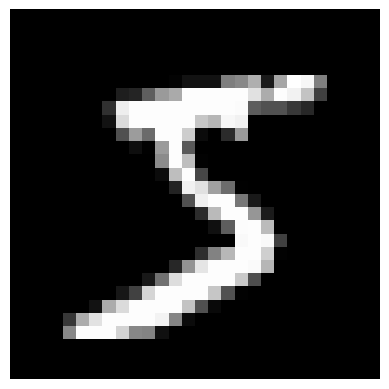

In [7]:
uno_sample = data.iloc[0, 1:]
plt.axis("off")
plt.imshow(np.array(uno_sample).reshape(28, 28, 1), cmap="gray");

In [46]:
def conv(image, filter):
    # image - (w, h, 1) np array
    # filter - (f, f, 1)
    w, h = image.shape
    f1, f2 = filter.shape


    output = np.zeros((w - f1 + 1, h - f2 + 1))

    for row in range(len(output)):
        for col in range(len(output[0])):
            output[row, col] = np.sum(filter * image[row:row+f1, col:col+f2])
    
    return output

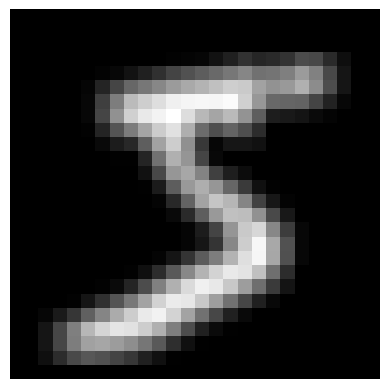

In [53]:
example = np.array(uno_sample).reshape(28, 28)
filter = np.ones((3, 3))

# Image is blurry, as expected!
plt.axis("off")
plt.imshow(conv(example, filter), cmap="gray");

In [59]:
start = time.time()
conv(example, filter)
end = time.time()

print(f"Operation took: {end - start} seconds")

Operation took: 0.0027675628662109375 seconds


Good!<br>
Really quick!